 ### Regression Modeling with Text Data

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df = pd.read_csv("daily_reports_France_II.csv", sep="\t")

text = df['texte']
tf_vectorizer = CountVectorizer(min_df=100) #filter based selector (keep the word appearing more than 100 times)
tf_vectorizer.fit(text)
X_texte = tf_vectorizer.transform(text)

# Alternative formulation using TF-IDF
#tfidf_vectorize = TfidfVectorizer()
#tfidf_vectorize.fit(lines)
#X_texte = tfidf_vectorize(lines)

load = pd.read_csv("data_load_FR.csv", sep = ",")

Y = load['Load']

print(X_texte.shape)
print(Y.shape)

(3896, 974)
(3896,)


In [2]:
df.head(5)

,date,texte
0,2008-01-01,Mardi 1 janvier : les hautes pressions résiste...
1,2008-01-02,Mercredi 2 janvier : à l'approche du talweg at...
2,2008-01-03,Jeudi 3 janvier : circulant dans un flux de su...
3,2008-01-04,Vendredi 4 janvier : à l'avant du talweg atlan...
4,2008-01-05,Samedi 5 janvier : le talweg du nord des îles ...


In [3]:
print(df["texte"][0])

Mardi 1 janvier : les hautes pressions résistent encore à tous les niveaux sur la France, rejetant ainsi les perturbations atlantiques sur les îles Britanniques. Le pays demeure sous l'influence d'une masse d'air subsidente piégeant beaucoup d'humidité de basses couches dans le Sud-Ouest et au nord de la Seine. Epais brouillards givrants et stratus sont une nouvelle fois prédominants au lever du jour au nord de la Loire, dans le Centre-Est et de la Gironde au Quercy et au Tarn. Cette grisaille, qui s'accompagne localement de petits crachins, n'évolue que très lentement au cours de la journée. Si le soleil réapparaît l'après-midi de l'Anjou à la Basse-Normandie ainsi qu'en Auvergne, nuages bas et brouillards persistent jusqu'au soir dans les plaines et vallées d'Aquitaine, au nord de la Seine et dans le Nord-Est. En marge des perturbations britanniques, quelques pluies faibles et éparses circulent en journée sur la Picardie et le Nord - Pas-de-Calais. Sous cette humidité stagnante, les 

In [16]:
Y.head()

0    60139.106667
1    71334.496667
2    74020.740833
3    70780.623333
4    62780.415833
Name: Load, dtype: float64

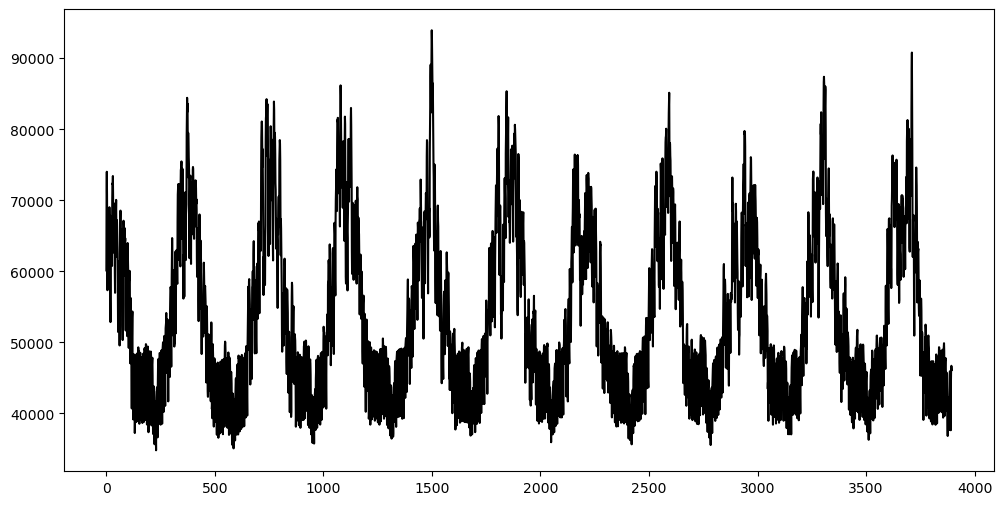

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(Y,color="black",label="Observed load")
plt.show()

In [5]:
from sklearn.ensemble import RandomForestRegressor as RFR

optim_HP = [0.05, 5, 10, 200]
rf = RFR(1000,
         max_features=optim_HP[0], 
         min_samples_leaf=optim_HP[1],
         min_samples_split=optim_HP[2],
         max_depth=optim_HP[3])

rf.fit(X_texte, Y)
y_RF = rf.predict(X_texte)

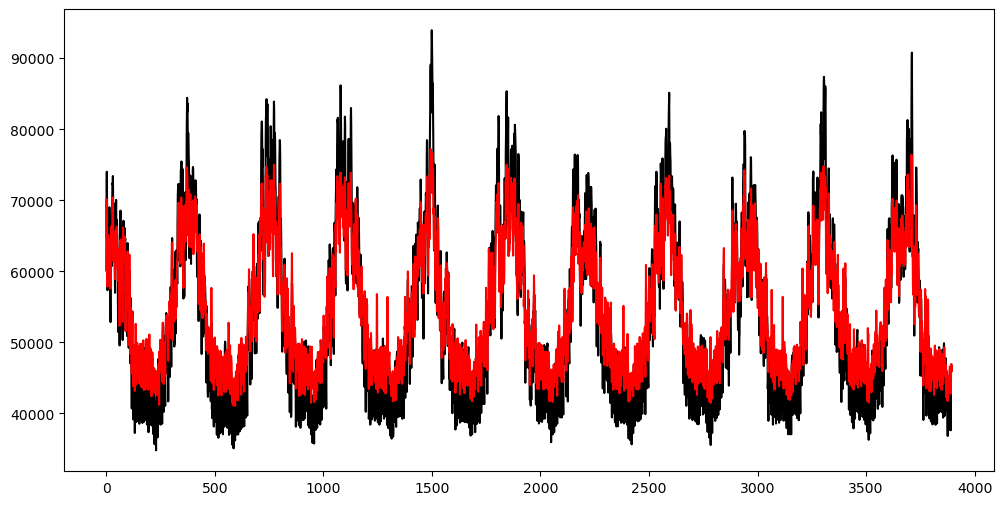

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(Y,color="black",label="Observed load")
plt.plot(y_RF,color="red",label="Forecast")
plt.show()

What you can do : 

- Use another weighting scheme (tf-ifd instead of tf)
- Split the data into a train/test dataset.
- Obtain the predictions on the test set. Notice that you should manage to reduce the features to those appearing in the training set.
- Obtain the features importance 
- Try to fit a Lasso regression of Y over X



In [8]:
#tf_vectorizer = CountVectorizer(min_df=100) #filter based selector (keep the word appearing more than 100 times)
#tf_vectorizer.fit(text)
#X_texte = tf_vectorizer.transform(text)

# Alternative formulation using TF-IDF
tfidf_vectorize = TfidfVectorizer(min_df=142)
tfidf_vectorize.fit(text)
X_texte = tfidf_vectorize.transform(text)

load = pd.read_csv("data_load_FR.csv", sep = ",")
Y = load['Load']

print(X_texte.shape)
print(Y.shape)

(3896, 781)
(3896,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Train and Test samples
X_train, X_test, y_train, y_test = train_test_split(X_texte, Y, test_size=0.33, random_state=42)

# Lasso linear regression
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
    
# Prediction accuracy
clf.score(X_test, y_test)

0.8105513648104319

In [10]:
y_clf = clf.predict(X_texte)

<module 'matplotlib.pyplot' from '/Users/issouani/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

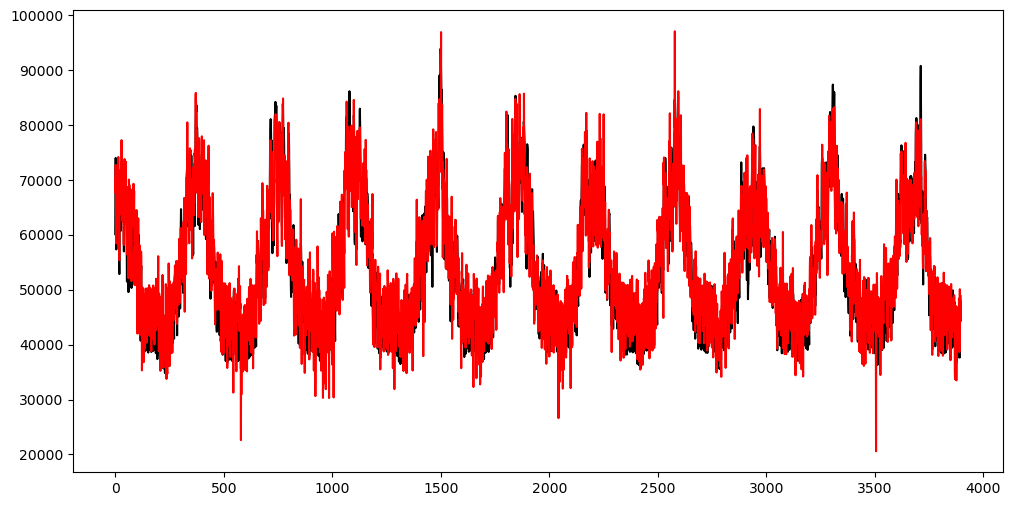

In [11]:
plt.figure(figsize=(12,6))
plt.plot(Y,color="black",label="Observed load")
plt.plot(y_clf,color="red",label="Forecast")

plt

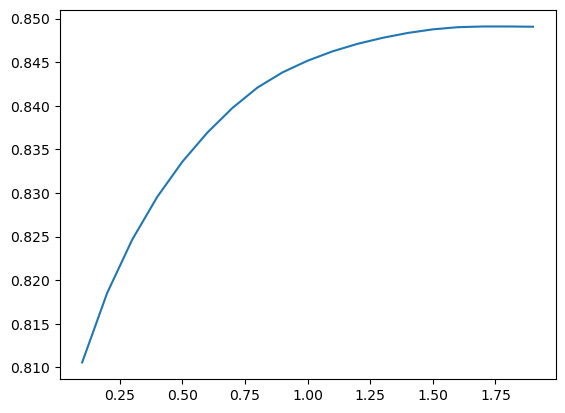

In [21]:
scores = []
for K in range(1,20):
    alpha_K = K/10
    clf = linear_model.Lasso(alpha=alpha_K)
    clf.fit(X_train, y_train)
    # Prediction accuracy
    scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(0.1,2,0.1) , scores)
plt.show()

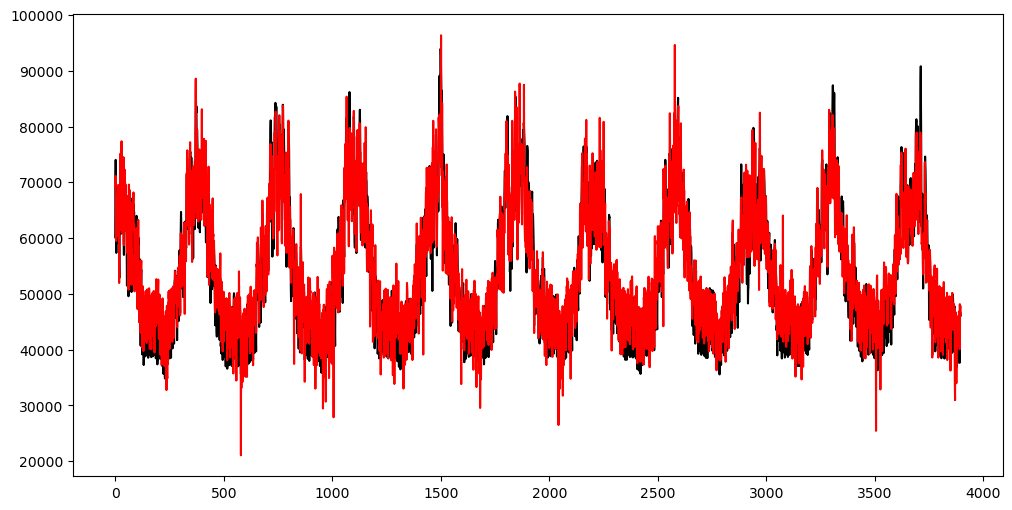

In [23]:
# Train and Test samples
X_train, X_test, y_train, y_test = train_test_split(X_texte, Y, test_size=0.33, random_state=42)

# Lasso linear regression
clf = linear_model.Lasso(alpha=1.5)
clf.fit(X_train, y_train)
    
# Prediction accuracy
clf.score(X_test, y_test)

y_clf = clf.predict(X_texte)

plt.figure(figsize=(12,6))
plt.plot(Y,color="black",label="Observed load")
plt.plot(y_clf,color="red",label="Forecast")

plt.show()

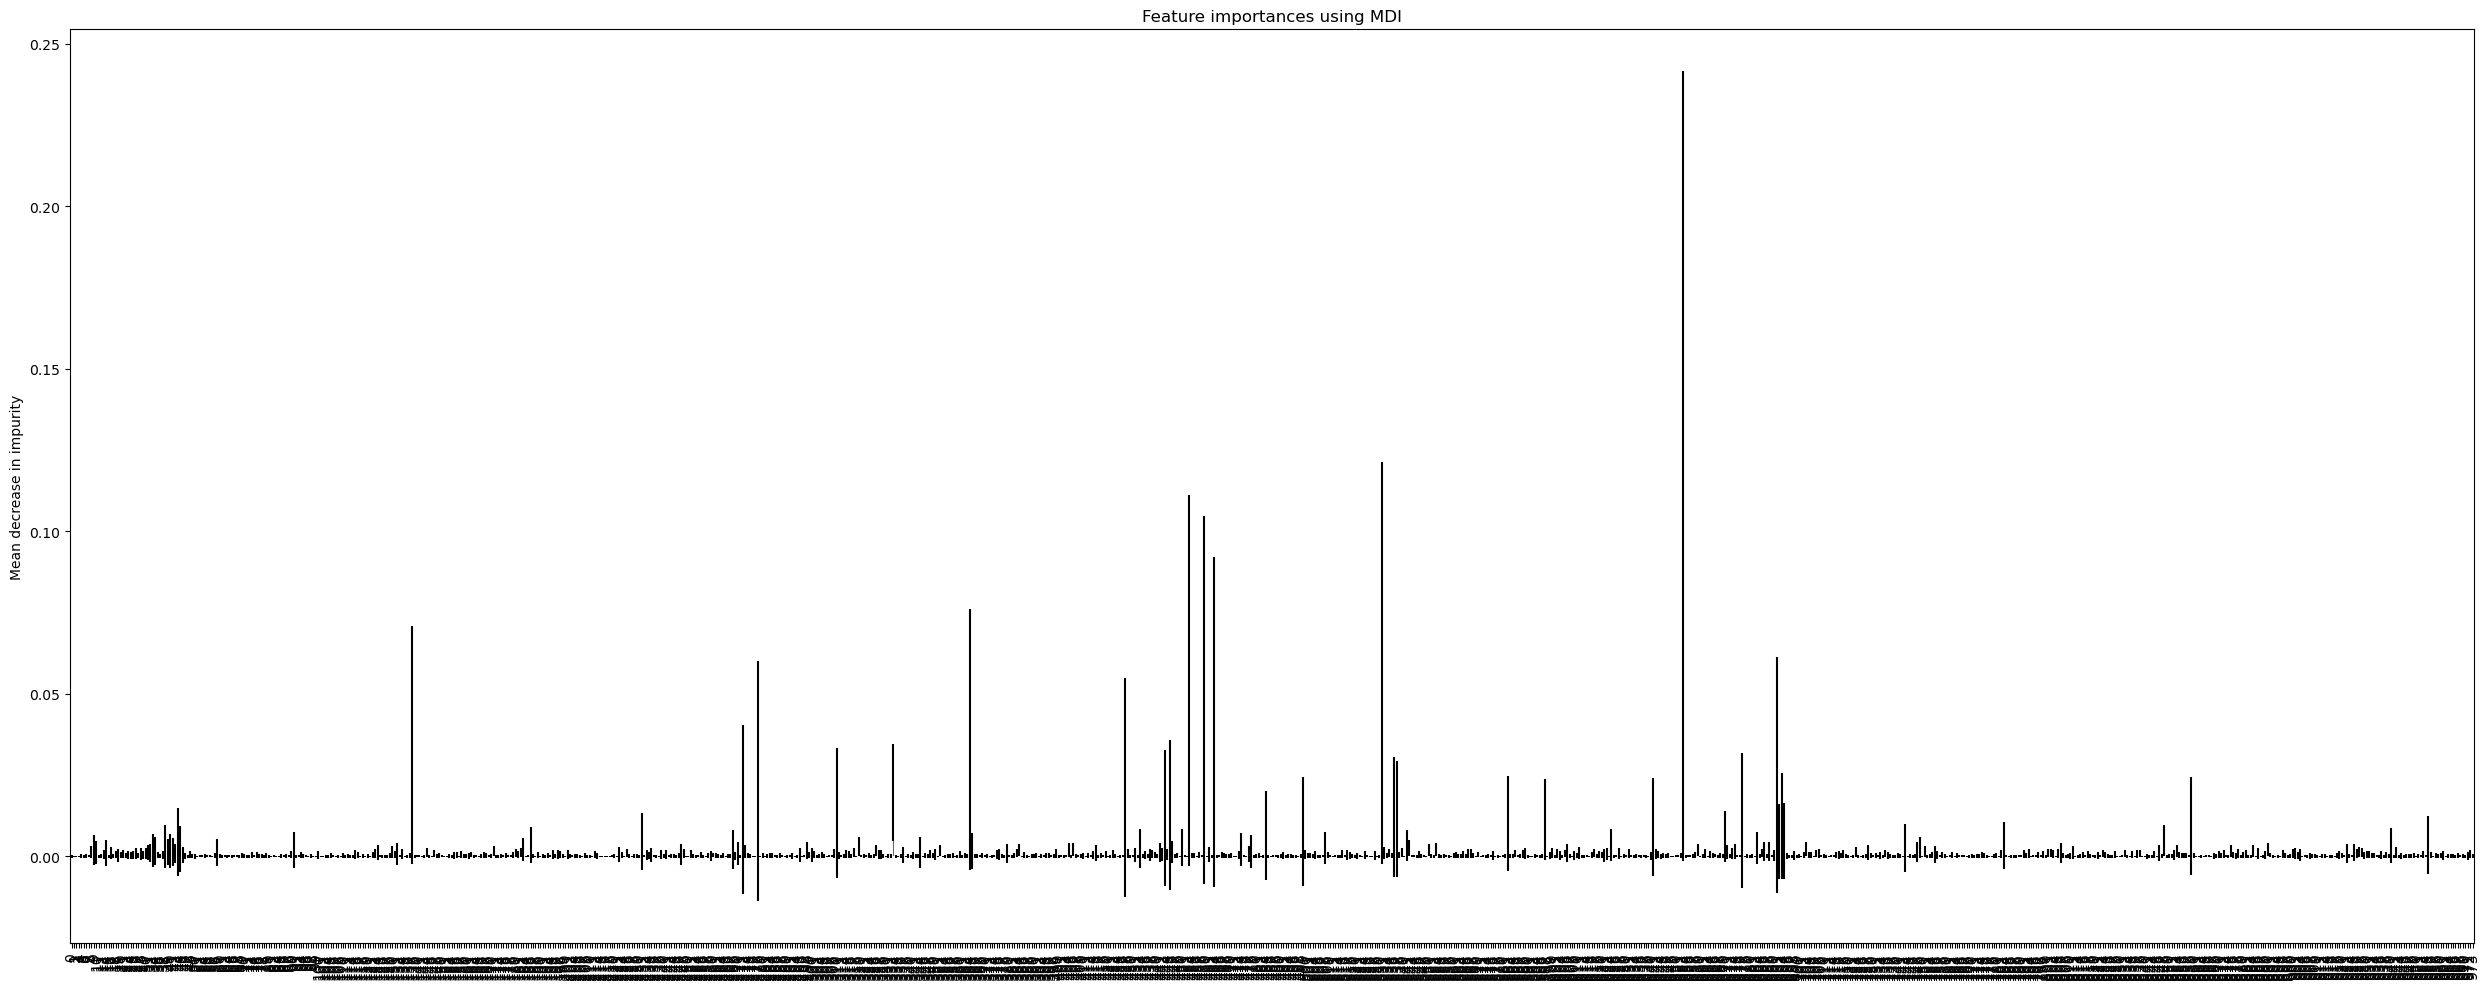

In [24]:
import pandas as pd
importances = rf.feature_importances_

feature_names = [f'feature {i}' for i in range(X_texte.shape[1])]

std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)

#forest_importances = pd.Series(importances, index=feature_names)
forest_importances = pd.Series(importances)

#plt.figure(figsize=(25,15))
fig, ax = plt.subplots(figsize=(25,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [15]:
importances[importances > 0.05]

array([0.0542062 , 0.05958558, 0.12018925])

Look into the available data in the web for our specific task !

